# Parse Banchmark

This document shows the results of a benchmarking I conducted on Parse platform useing [Parse Python Rest API](https://parse.com/docs/rest/). <br>
The banchmarking includes write objects (Add new object to Parse DB)
Query Data (Read from DB)


* [Using and Connection](#Connect_to_DB)
* [Read Single value](#Single_Read)
* [Add_BacnhMark](#Add_BacnhMark)
    * [Results](#Results_1)
* [Query_BanchMark](#Query_BanchMark)
    * [Results](#Results_2)



## Connect_to_DB

In [1]:
import json,httplib,urllib # Parse imports

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import threading

In [6]:
import time

In [164]:
connection = httplib.HTTPSConnection('api.parse.com', 443)
connection.connect()

In [ ]:
appDict = {
    'dc_x_app_id':'X-Parse-Application-Id',
    'dc_v_app_id':'zSdMbFPkNroYsYJ1r7pz9jt9OHdVLWNsZWp4l3F7',
    'dc_x_app_key':'X-Parse-REST-API-Key',
    'dc_v_app_key':'XTbvW3CacGl8FUIuafboQgGz07n7sZcMHKvCTP4p',
    'dc_x_cnt_typ':'Content-Type',
    'dc_v_cnt_typ':'application/json',
}

## Single_Read

Single Read from Jobs DB
1. verify connection time
2. verify request time

In [166]:
param = "Jobs"

In [167]:
before = time.time()
connection.request('GET', '/1/classes/%s' % param, '', {
       appDict['dc_x_app_id'] : appDict['dc_v_app_id'] ,
       appDict['dc_x_app_key'] : appDict['dc_v_app_key'] ,
     })
afterCreateConn = time.time()

resp = connection.getresponse().read()

after = time.time()

result = json.loads(resp)

print '%20s %.7f' % ("Create connection = " , afterCreateConn - before)
print '%20s %.7f' % ("Execute connection = " , after - afterCreateConn)

print type(result)
print len(result['results'])

Create connection =  0.0020001
Execute connection =  0.1900001
<type 'dict'>
16


## Add_BanchMark

Write to DB 1000 new enterys containing (string, integer, boolean) <br>
save the time of each connection

In [188]:
import json,httplib
connection = httplib.HTTPSConnection('api.parse.com', 443)
connection.connect()

string = "ABCDEFGHIJKLMNOPQRSTUVWYZ ABCDEFGHIJKLMNOPQRSTUVWYZ ABCDEFGHIJKLMNOPQRSTUVWYZ"

timeResList = []

print "Sending..."
for number in range (0,1000):
    before = time.time()
    connection.request('POST', '/1/classes/BanchMarkTesting', json.dumps({
           "VarA": number,
           "VarB": string,
           "VarC": False
         }), {
           appDict['dc_x_app_id'] : appDict['dc_v_app_id'] ,
           appDict['dc_x_app_key'] : appDict['dc_v_app_key'] ,
           appDict['dc_x_cnt_typ'] : appDict['dc_v_cnt_typ'] ,
         })
    afterCreateConn = time.time()
    
    connectionResp = connection.getresponse().read()
    
    after = time.time()
    
    timeResList.append([afterCreateConn-before,after-afterCreateConn])
    results = json.loads(connectionResp)
    # print results

print "Done!"    

Sending...
Done!


         0      1
0    0.001  0.210
1    0.000  0.180
2    0.001  0.178
3    0.001  0.190
4    0.000  0.179
5    0.001  0.178
6    0.000  0.184
7    0.000  0.184
8    0.000  0.186
9    0.001  1.369
10   0.000  0.180
11   0.000  0.182
12   0.001  0.187
13   0.001  0.181
14   0.000  0.175
15   0.001  0.176
16   0.000  0.189
17   0.001  0.177
18   0.000  0.216
19   0.000  0.177
20   0.001  0.182
21   0.001  0.176
22   0.001  0.178
23   0.001  0.188
24   0.001  0.180
25   0.000  0.185
26   0.000  0.173
27   0.001  0.188
28   0.001  0.179
29   0.001  0.176
..     ...    ...
970  0.000  0.176
971  0.000  0.177
972  0.000  0.179
973  0.000  0.179
974  0.001  0.174
975  0.000  0.187
976  0.000  0.179
977  0.001  0.179
978  0.001  0.190
979  0.000  0.191
980  0.000  1.749
981  0.001  0.189
982  0.000  0.177
983  0.001  0.177
984  0.000  0.181
985  0.000  0.176
986  0.001  0.174
987  0.000  0.177
988  0.000  0.193
989  0.001  0.175
990  0.000  0.190
991  0.000  0.177
992  0.001  0.177
993  0.000

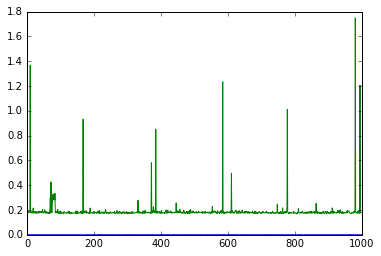

In [195]:
timeDataFrame = pd.DataFrame(timeResList)

print timeDataFrame
plt.plot(timeDataFrame)
plt.savefig('test.png', bbox_inches='tight')



In [16]:
import json,httplib
connection = httplib.HTTPSConnection('api.parse.com', 443)
connection.connect()

timeResList = []

for i in range (0,40):
    connection.request('GET', '/1/classes/BanchMarkTesting', '', {
           "X-Parse-Application-Id": "zSdMbFPkNroYsYJ1r7pz9jt9OHdVLWNsZWp4l3F7",
           "X-Parse-REST-API-Key": "XTbvW3CacGl8FUIuafboQgGz07n7sZcMHKvCTP4p"
         })

    before = time.time()
    queryRes = connection.getresponse().read();
    after = time.time()
    timeResList.append(after - before)
    print '%20s %.7f' % ("Create connection = " , after - before)

#result = json.loads(queryRes)


Create connection =  0.3460000
Create connection =  0.3340001
Create connection =  0.3329999
Create connection =  0.5120001
Create connection =  0.3360002
Create connection =  0.3510001
Create connection =  0.1859999
Create connection =  0.1870000
Create connection =  0.2040000
Create connection =  0.2049999
Create connection =  0.2140000
Create connection =  0.1940000
Create connection =  0.1920002
Create connection =  0.1910000
Create connection =  0.1970000
Create connection =  0.2510002
Create connection =  0.2149999
Create connection =  0.1860001
Create connection =  0.1949999
Create connection =  0.1840000
Create connection =  0.1849999
Create connection =  0.1949999
Create connection =  0.1910000
Create connection =  0.1849999
Create connection =  1.3590000
Create connection =  0.3460002
Create connection =  0.3320000
Create connection =  0.1930001
Create connection =  0.1859999
Create connection =  0.1799998
Create connection =  0.1910000
Create connection =  0.1840000
Create c

### Results_1

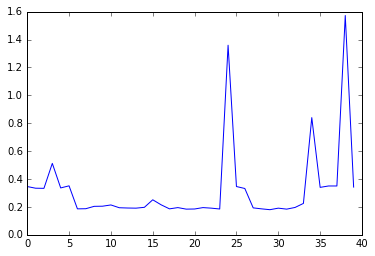

In [17]:
timeDataFrame = pd.DataFrame(timeResList)

plt.title('Histogram of request time to add new data')
plt.ylabel('Time of single request in sec')
plt.xlabel('request number')

plt.plot(timeDataFrame)
plt.savefig('test.png', bbox_inches='tight')


## Query_BanchMark

Create connection =  0.2260001
Create connection =  0.1889999
Create connection =  0.3600001
Create connection =  0.1970000
Create connection =  0.1950002
Create connection =  0.1870000
Create connection =  0.1830001
Create connection =  0.1810000
Create connection =  0.1930001
Create connection =  0.1880000
Create connection =  0.1849999
Create connection =  0.2090001
Create connection =  0.1950002
Create connection =  0.1740000
Create connection =  0.2200000
Create connection =  0.1810000
Create connection =  0.1849999
Create connection =  0.1759999
Create connection =  0.1889999
Create connection =  0.1880000
Create connection =  0.2040000
Create connection =  0.1890001
Create connection =  0.1889999
Create connection =  0.1750002
Create connection =  0.5539999
Create connection =  0.1919999
Create connection =  0.2019999
Create connection =  0.1810000
Create connection =  0.1930001
Create connection =  0.2149999
Create connection =  0.1910000
Create connection =  0.1819999
Create c

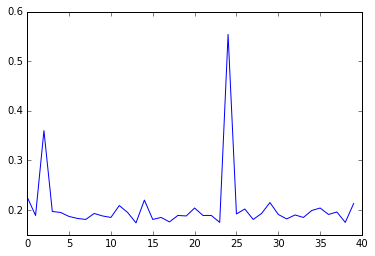

In [20]:
import json,httplib,urllib
connection = httplib.HTTPSConnection('api.parse.com', 443)
params = urllib.urlencode({"where":json.dumps({
       "VarA": {
         "$gte": 580,
         "$lte": 600
       }
     })})
connection.connect()

timeResList = []

for i in range (0,40):
    connection.request('GET', '/1/classes/BanchMarkTesting?%s' % params, '', {
           "X-Parse-Application-Id": "zSdMbFPkNroYsYJ1r7pz9jt9OHdVLWNsZWp4l3F7",
           "X-Parse-REST-API-Key": "XTbvW3CacGl8FUIuafboQgGz07n7sZcMHKvCTP4p"
         })
    before = time.time()
    result = json.loads(connection.getresponse().read())
    after = time.time()
    timeResList.append(after-before)
    print '%20s %.7f' % ("Create connection = " , after - before)

### Results_2

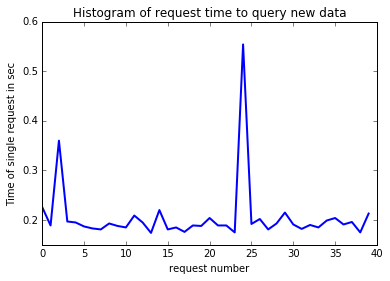

In [25]:
timeDataFrame = pd.DataFrame(timeResList)
plt.title('Histogram of request time to query new data')
plt.ylabel('Time of single request in sec')
plt.xlabel('request number')

plt.plot(timeDataFrame, lw=2)
plt.savefig('test.png', bbox_inches='tight')
